# Misure di Tendenza Centrale, Dispersione e Forma

La statistica descrittiva si occupa di descrivere, rappresentare e sintetizzare un campione di dati relativo ad una popolazione. Gli strumenti della statistica descrittiva possono essere sia numerici che grafici. I dati analizzati possono essere descritti secondo diversi aspetti. Esistono pertanto diversi "indicatori" oggettivi:
 * **numerosità** del campione;
 * **indicatori centrali**: media, mediana, moda;
 * **Indicatori di dispersione**: estremi, range, quantili, percentili, quartili, distanza inter-quartile, varianza;
 * **Indicatori di forma**: simmetria/asimmetria rispetto alla media (skewness), "piattezza" o modalità di concentrazione dei dati intorno alla media ("kurtosis").

Per esaminare questi strumenti, ci avvremo del dataset **Titanic**. Si tratta di un dataset classico, che riporta alcune informazioni, quali sesso, età, classe di imbarco e sopravvivenza di alcuni passaggeri del Titanic. Troviamo una versione del dataset al seguente URL:

https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv

Carichiamo il dataset mediante la libreria Pandas:

In [1]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')

Visualizziamo alcune informazioni sul dataset:

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Il dataset contiene $891$ osservazioni e $11$ colonne. Visualizziamo le prime righe del DataFrame per vedere com'è organizzato:

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Numerosità

La numerosità di un campione univariato $\{x^{(i)}\}_i^N$ è dato dal numero di valori in esso contenuto: $|X|=|\{x^{(i)}\}_i^N| = N$. La numerosità dei campioni costituiti dalle singole colonne può essere ottenuta mediante il metodo `len`:

In [4]:
print(len(titanic['Age']))

891


Il metodo `len` però non considera i dati incompleti (la colonna potrebbe contenere dei `NaN`). Per ottenere un conteggio più corretto possiamo esplicitamente eliminare i `NaN` con `dropna`:

In [5]:
print(len(titanic['Age'].dropna()))

714


Come possiamo notare, il campione è meno numeroso di quello che sembrava. Alternativamente possiamo richiamare `info` sul DataFrame:

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Lo schema sopra mostra il numero di oggetti `non-null` per ogni colonna. Coerentemente con quanto visto prima, abbiamo solo $714$ elementi di `Age` validi.

> **🙋‍♂️ Domanda 1**
>
> Qual è la numerosità di `Cabin`?

## Indicatori Centrali: Media, Mediana e Moda

Gli indicatori centrali danno un'idea approssimata dell'ordine di grandezza dei valori del campione. 

### Media

La media di un campione è definita come la somma dei suoi valori diviso la sua numerosità: $\overline X = \frac{1}{N}\sum_i^N x^{(i)}$. Possiamo calcolarlo manualmente:

In [7]:
titanic['Age'].sum()/len(titanic['Age'].dropna())

29.69911764705882

O semplicemente mediante la funzione `mean`:

In [8]:
titanic['Age'].mean()

29.69911764705882


> **🙋‍♂️ Domanda 2**
>
> In quali casi la media riassume bene i dati? In quali casi no?

### Mediana

Quando gli elementi di un campione possono essere ordinati (ad esempio se sono valori numerici), la mediana di un campione (o l'elemento mediano) è l'elemento che divide in due parti uguali l'insieme ordinato dei valori del campione.  L'elemento mediano di può ottenere ordinando i valori del campione e prendendo quello che si trova nella posizione intermedia:

In [9]:
import numpy as np
a=pd.Series([1,-2,3,-4,7])
print(a.sort_values())
print("Mediana: {}".format(a.sort_values().iloc[2]))

3   -4
1   -2
0    1
2    3
4    7
dtype: int64
Mediana: 1


o alternativamente mediante il metodo `median`:

In [10]:
a.median()

1.0

Calcoliamo ad esempio il valore mediano di `Age`:

In [11]:
titanic['Age'].median()

28.0


> **🙋‍♂️ Domanda 3**
>
> Si confronti la media di `Age` con la sua mediana. I due valori corrispondono? Perché? Quali dei due valori è uguale a uno dei valori appartenente al campione?

### Moda
La moda di un campione è l'elemento che si ripete più spesso. Possiamo calcolare la moda ordinando i valori per frequenza mediante `value_counts` e selezionando l'indice del primo valore:

In [12]:
print(titanic['Age'].value_counts().head())
print("Moda: ",titanic['Age'].value_counts().index[0])

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64
Moda:  24.0


Alternativamente, possiamo usare la funzione `mode`:

In [13]:
titanic['Age'].mode()

0    24.0
dtype: float64


> **🙋‍♂️ Domanda 4**
>
> Si confrontino la moda di `Age` con la sua media. I valori corrispondono? Perché? 

## Indicatori di dispersione (1): estremi, range, quartili

### Minimo, Massimo e Range
Semplici indici di dispersione sono il minimo ($min \{x^{(i)}\}_i^N$), il massimo ($max \{x^{(i)}\}_i^N$) e il range ($max \{x^{(i)}\}_i^N$ - $min \{x^{(i)}\}_i^N$). Questi possono essere facilmente calcolati come segue:

In [14]:
print("Minimo:", titanic['Age'].min())
print("Massimo:", titanic['Age'].max())
print("Range:", titanic['Age'].max() - titanic['Age'].min())

Minimo: 0.42
Massimo: 80.0
Range: 79.58



> **🙋‍♂️ Domanda 5**
>
> Il range è un indicatore di dispersione robusto alla presenza di "outliers"?

Il range dei dati dipende fortemente dalla natura dei dati e dalla loro unità di misura. Ad esempio, le età dei passeggeri del Titanic si misurano in anni, mentre i prezzi pagati per il biglietto in sterline. Per evitare problemi di stabilità di calcolo quando si utilizzano dati in unità di misure diverse, è prassi comune normalizzarli in modo che il loro range sia compreso entro determinati limiti.

#### Normalizzazione tra 0 e 1
I dati vengono riscalati come segue:
\begin{equation}
x_{norm} = (x-x_{min})/(x_{max}-x_{min})
\end{equation}

Possiamo effettuare questa trasformazione in Pandas come segue:

In [15]:
age_norm_01 = (titanic['Age']-titanic['Age'].min())/(titanic['Age'].max()-titanic['Age'].min())

Verifichiamo che gli estremi del nuovo campione siano 0 e 1:

In [16]:
print(age_norm_01.min(), age_norm_01.max())

0.0 1.0


#### Normalizzazione tra -1 e 1
I dati vengono riscalati come segue:
\begin{equation}
x_{norm} = (x_{max}+x_{min}-2\cdot x)/(x_{max}-x_{min})
\end{equation}

Possiamo effettuare questa trasformazione in Pandas come segue:

In [17]:
age_norm_11 = (titanic['Age'].max()+titanic['Age'].min()-2*titanic['Age'])/(titanic['Age'].max()-titanic['Age'].min())

Verifichiamo che gli estremi del nuovo campione siano -1 e 1:

In [18]:
print(age_norm_11.min(), age_norm_11.max())

-1.0 1.0


### Quantili, Percentili e Quartili

In pandas, i quantili si ottengono mediante il metodo `quantile`:

In [19]:
print("Quantile di ordine 0 (minimo):", titanic['Age'].quantile(0))
print("Quantile di ordine 0.5 (mediana):", titanic['Age'].quantile(0.5))
print("Quantile di ordine 1 (massimo):", titanic['Age'].quantile(1))
print("Quantile di ordine 0.15:", titanic['Age'].quantile(0.15))

Quantile di ordine 0 (minimo): 0.42
Quantile di ordine 0.5 (mediana): 28.0
Quantile di ordine 1 (massimo): 80.0
Quantile di ordine 0.15: 17.0


I percentili si ottengono sempre mediante la funzione `quantile`, dividendo l'ordine per percentile per 100:

In [20]:
print("Percentile di ordine 50% (mediana):", titanic['Age'].quantile(50/100))
print("Percentile di ordine 30%:", titanic['Age'].quantile(30/100))

Percentile di ordine 50% (mediana): 28.0
Percentile di ordine 30%: 22.0


Analogamente, i quartili si ottengono dividendo l'ordine del quartile per 4:

In [21]:
print("Quartile di ordine 0 (minimo):", titanic['Age'].quantile(0/4))
print("Quartile di ordine 1:", titanic['Age'].quantile(1/4))
print("Quartile di ordine 2 (mediana):", titanic['Age'].quantile(2/4))
print("Quartile di ordine 3:", titanic['Age'].quantile(3/4))
print("Quartile di ordine 4 (massimo):", titanic['Age'].quantile(4/4))

Quartile di ordine 0 (minimo): 0.42
Quartile di ordine 1: 20.125
Quartile di ordine 2 (mediana): 28.0
Quartile di ordine 3: 38.0
Quartile di ordine 4 (massimo): 80.0



> **🙋‍♂️ Domanda 6**
>
> Anche i quartili, come il minimo e il massimo, permettono di farsi un'idea dell'ordine di grandezza dei dati analizzati, tuttavia, i quartili hanno un vantaggio, quale?

## Boxplot

I boxplot costituiscono un metodo di visualizzazione compatto per rappresentare alcune caratteristiche descrittive dei dati sotto analisi. In particolare, dato un campione, un boxplot riesce a rappresentarne efficacemente le seguenti quantità:
 * Valore mediano;
 * Primo e terzo quartile;
 * Minimo e massimo (a seconda della "versione" del boxplot, come discusso di seguito).

Possiamo visualizzare un boxplot direttamente mediante `Pandas`:

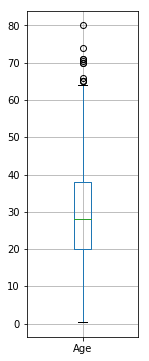

In [58]:
from matplotlib import pyplot as plt
titanic['Age'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Il boxplot si mostra come una "scatola" con dei "baffi" in cui:
 * l'estremo inferiore della scatola indica il primo quartile;
 * l'estremo superiore della scatola indica il terzo quartile;
 * la linea orizzontale in mezzo alla scatola rappresenta il valore mediano del campione;
 * il baffo inferiore rappresenta il primo valore nel campione che risulta essere maggiore o uguale al primo quartile meno una volta e mezza la distanza tra i il terzo e il primo quartile;
 * il baffo superiore rappresenta il primo valore nel campione che risulta essere minore o uguale al terzo quartile più una volta e mezza la distanza tra i il terzo e il primo quartile;
 * i tondini rappresentano i valori "fuori limite" che ricadono fuori dall'intervallo contrassegnato dai baffi. Vengono in genere considerati come "outliers".

Alternativamente, possiamo mostrare un boxplot mediante matplotlib:

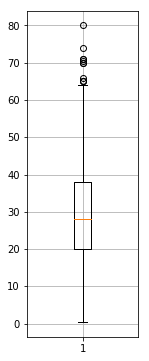

In [23]:
plt.figure(figsize=(2,6))
plt.boxplot(titanic['Age'].dropna())#inseriamo dropna per eliminare i NaN
plt.grid()
plt.show()

### Boxplot Multipli

Mediante `Pandas` è possibile mostrare i boxplot di tutte le variabili numeriche di un DataFrame come segue:

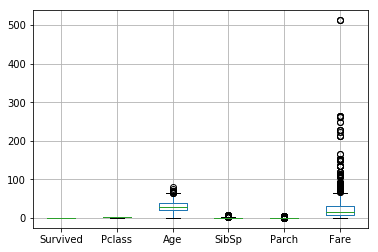

In [24]:
titanic.plot.box()
plt.grid()
plt.show()

Se vogliamo restringere l'analisi ad alcune variabili, possiamo selezionare solo le variabili interessate come segue:

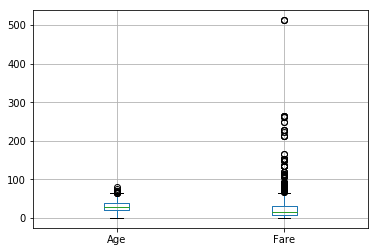

In [25]:
titanic[['Age','Fare']].plot.box()
plt.grid()
plt.show()

E' inoltre possibile confrontare i boxplot di diversi campioni. Supponiamo di voler confrontare le età di uomini e donne:

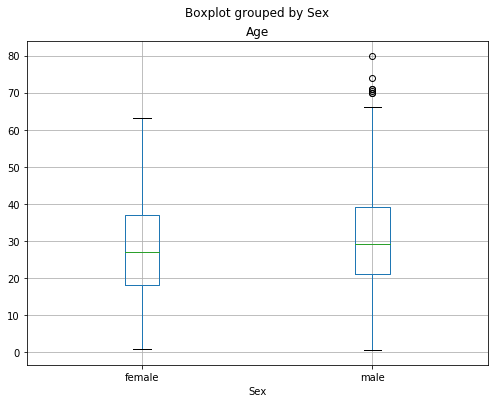

In [26]:
titanic.boxplot(by='Sex',column=['Age'], figsize=(8,6))
plt.show()

Nel caso di variabili multiple:

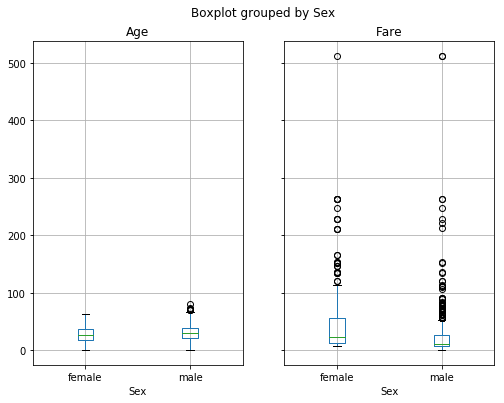

In [27]:
titanic.boxplot(by='Sex',column=['Age','Fare'], figsize=(8,6))
plt.show()

Possiamo anche combinare i boxplot con un `groupby`. Confrontiamo ad esempio le tariffe pagate da e donne appartenenti alle tre classi di imbarco:

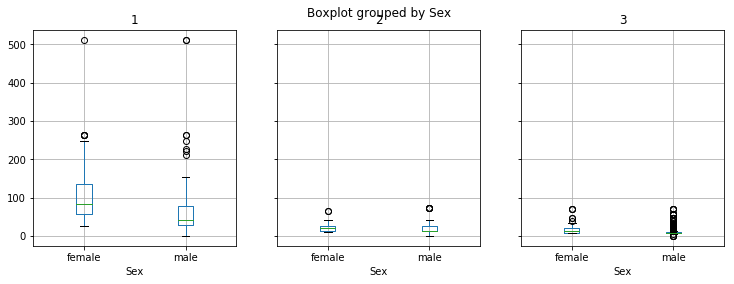

In [28]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Fare'], figsize=(12,4), layout=(1,3))
plt.show()

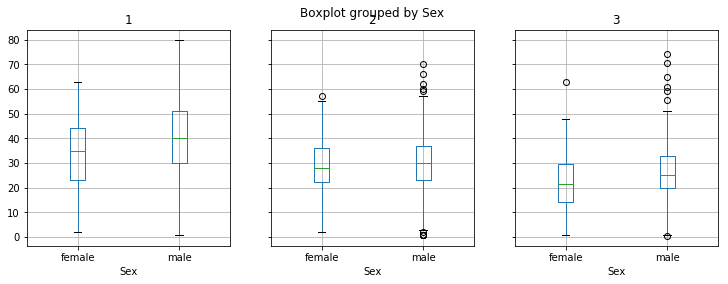

In [29]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Age'], figsize=(12,4), layout=(1,3))
plt.show()

> **🙋‍♂️ Domanda 7**
>
> Si confrontino le età di donne e uomini nelle varie classi di imbarco. In quale classe esistano differenze notevoli tra le età di uomini e donne?

## Indicatori di dispersione (2), distanza inter-quartile e varianza

### Distanza interquartile

Il range non è un indice di dispersione molto robusto, in quanto non tiene conto della presenza di evenutali outliers. Si considerino ad esempio le seguenti popolazioni "artificiali":

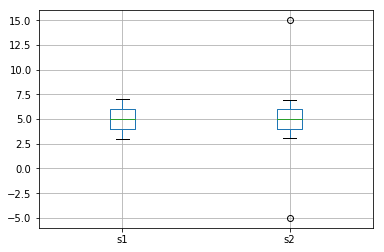

Range sample 1: 4.0
Range sample 2: 20.0


In [30]:
sample1 = np.linspace(3,7,100)
sample2 = sample1.copy()
sample2[0]=-5 #sostituiamo due valori con gli outliers -5
sample2[-1]=15 # e 15

df = pd.DataFrame({'s1':sample1,'s2':sample2})

df.plot.box()
plt.grid()
plt.show()

print("Range sample 1:",df['s1'].max()-df['s1'].min())
print("Range sample 2:",df['s2'].max()-df['s2'].min())

I campioni sono simili, ma la presenza di due outliers (-5 e 15) nel secondo campione rende i range molto diversi (4 e 20).

Confrontando i due boxplot mostrati sopra, notiamo che le posizioni del terzo e del primo quartile sono più "robuste" agli outliers. Una misura di dispersione un po' più espressiva è dunque lo **scarto interquartile** (o **distanza interquartile**), che si misura come la differenza tra il terzo e il primo quartile:

In [31]:
q11,q13 = df['s1'].quantile([1/4,3/4])
q21,q23 = df['s2'].quantile([1/4,3/4])
print("Lo scarto interquartile di sample 1 è:",q13-q11)
print("Lo scarto interquartile di sample 2 è:",q23-q21)

Lo scarto interquartile di sample 1 è: 2.0
Lo scarto interquartile di sample 2 è: 2.0


> **🙋‍♂️ Domanda 8**
>
> La distanza interquartile è sempre una misura di dispersione robusta? Cosa succede nel caso di distribuzioni fortemente asimmetriche?

### Varianza e Deviazione Standard

La varianza (detto anche scarto quadratico medio) fornisce una stima di quanto i dati osservati si allontanano dalla media. La varianza calcola la media dei quadrati degli scarti dei valori rispetto alla media, penalizzando i grandi scostamenti dal valore medio (dovuti agli outliers) maggiormente più dei piccoli scostamenti:

\begin{equation}
s^2 = \frac{\sum_{i=1}^n(x_i-\overline x)^2}{n}
\end{equation}

La varianza può essere calcolata richiamando il metodo `var`:

In [32]:
print(df['s1'].var())
print(df['s2'].var())

1.3740094548175354
3.313403394211474


Gli indici di dispersione visti fino ad ora (esclusa la varianza) hanno come unità di misura la stessa dei dati di input. Nel caso della popolazione di età dei passeggeri del Titanic, i dati vengono misurati in anni. E' pertanto corretto dire che **minimo**, **massimo**, **range**, **scarto interquartile** e **scarto medio assoluto** della popolazione si misurano in anni.

Lo stesso discorso non vale per la varianza, che si misurera in **anni al quadrato**. Se vogliamo ottenere una misura di dispersione **commensurabile**, possiamo calcolare la radice quadrata della varianza, ottenendo così la **deviazione standard** (o **scarto quadratico medio**), che si definisce come segue:

\begin{equation}
s = \sqrt{s^2}=\sqrt{\frac{\sum_{i=1}{n}(x_i-x^2)}{n}}
\end{equation}

La **deviazione standard** si calcola mediante il metodo `std`:

In [33]:
print("Deviazione standard del campione:",titanic['Age'].std(),"anni")

Deviazione standard del campione: 14.526497332334044 anni


La deviazione standard ci dice qualcosa anche sulla "forma" della distribuzione. Confrontiamo ad esempio le deviazioni standard delle età dei passeggeri appartenenti alle tre classi di imbarco:

In [34]:
titanic.groupby('Pclass')['Age'].std()

Pclass
1    14.802856
2    14.001077
3    12.495398
Name: Age, dtype: float64

Confrontiamo adesso le densità stimate dai tre campioni:

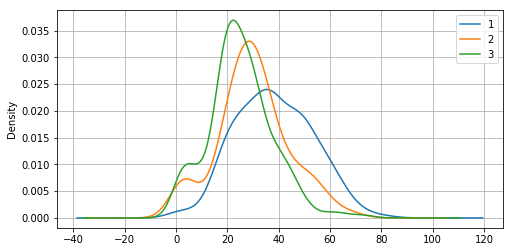

In [35]:
titanic.groupby('Pclass')['Age'].plot.density(figsize=(8,4))
plt.grid()
plt.legend()
plt.show()

> **🙋‍♂️ Domanda 9**
>
> Esiste una relazione tra le deviazioni standard dei campioni e le relative densità? Quale?

### Standardizzazione (z-scoring)

In molti casi è utile normalizzare i dati in modo che essi presentino media nulla e deviazione standard unitaria. Questo tipo di normalizzazione viene detta "z-scoring" e viene effettuata sottraendo ai dati la media e dividendo per la deviazione standard. 

\begin{equation}
z_i = \frac{x_i-\mu_X}{\sigma_X}
\end{equation}

dove $\sigma_X$ è la deviazione standard della popolazione alla quale appartiene $X$. Si noti che gli zeta scores sono **adimensionali** (ovvero, non hanno unità di misura).

Possiamo effettuare questa normalizzazione usando la funzione `zscore` di `scipy`:

In [36]:
from scipy.stats import zscore
zscore([0,1,2,3,4])

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

Applichiamo questa normalizzazione alle età dei passeggeri del Titanic:

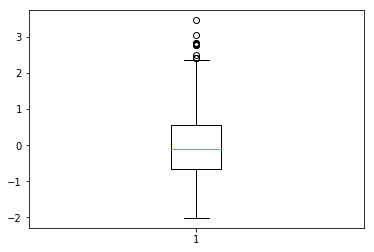

In [37]:
age_z=zscore(titanic['Age'].dropna())
plt.boxplot(age_z)
plt.show()

Una interpretazione comune degli z-scores è che essi misurano la deviazione dalla media in termini di deviazione standard della popolazione rispondendo alla domande "quante $\sigma$ ci sono tra il campione e la media"? 

## Indicatori di forma

Gli indicatori di forma permettono di farsi un'idea su determinati aspetti della "forma" della distribuzione.

### Asimmetria (skewness)
La skewness è indice dello "sbilanciamento" a sinistra (valore negativo) o a destra (valore positivo) di un campione di dati rispetto al valore centrale. Se la skewness è zero, allora la distribuzione dei dati è bilanciata rispetto al valore centrale. Calcoliamo la skewness di tutte le colonne del dataframe:

In [38]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Consideriamo la variabile `Parch` e visualizziamone il density plot:

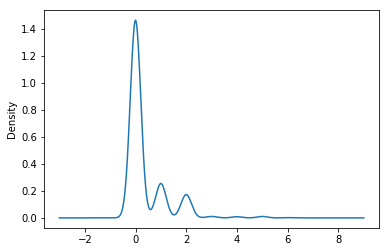

In [39]:
titanic['Parch'].plot.density()
plt.show()

Allo stesso modo, consideriamo la variabile `Pclass` e visualizziamone il density plot:

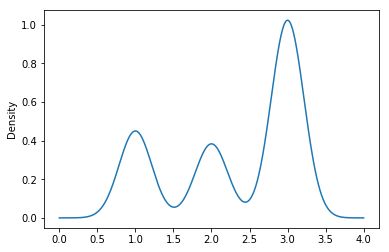

In [40]:
titanic['Pclass'].plot.density()
plt.show()

> **🙋‍♂️ Domanda 10**
>
> I plot sono in accordo con i valori di skewness calcolati sopra? Verificare anche nel caso di altre veriabili.

### Curtosi (kurtosis)
L'indice di curtosi misura lo "spessore" delle code di una misura di densità. Nella versione implementata in `Pandas`, esso è definito come segue:

\begin{equation}
k=\frac{m^4}{\sigma^4} - 3
\end{equation}

dove $m^4$ è il quarto momento centrale, $\sigma^4$ è il quadrato della varianza e $\frac{m^4}{\sigma^4}=3$ nel caso di una distribuzione normale (dunque $k=0$ nel caso di una distribuzione Normale). L'indice va interpretato così:
 * Se è maggiore di zero, la distribuzione è *leptocurtica*, ovvero più "appuntita" di una distribuzione Normale;
 * Se è minore di zero, la distribuzione è *platicurtica*, ovvero più "piatta" di una distribuzione Normale;
 * Se è uguale a zero, la distribuzione è *normocurtica *, ovvero le code sono simili a quelle di una normale.
 
Calcoliamo gli indici di curtosi delle varie colonne:

In [41]:
titanic.kurtosis()

Survived    -1.775005
Pclass      -1.280015
Age          0.178274
SibSp       17.880420
Parch        9.778125
Fare        33.398141
dtype: float64

Stimiamo la densità di Fare, che mostra un alto indice di curtosi:

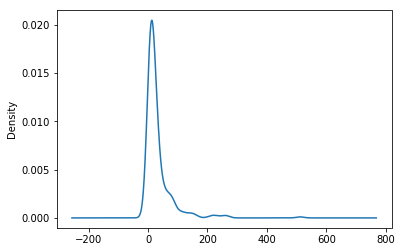

In [42]:
titanic['Fare'].plot.density()
plt.show()

> **🙋‍♂️ Domanda 11**
>
> La distribuzione è più o meno "appuntita" di una Normale? E' coerente con l'interpretazione dell'indice di curtosi? Verificare la relazione tra forma e indice di curtosi anche per altre variabili.

Allo stesso modo, mostriamo la densità di Survived:

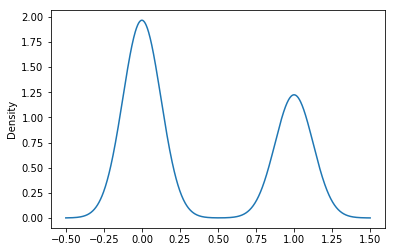

In [43]:
titanic['Survived'].plot.density()
plt.show()

> **🙋‍♂️ Domanda 12**
>
> La forma della distribuzione è coerete con l'indice di curtosi? Perché?

## Esercizi

> 🧑‍💻 Esercizio 1
> 
> Considerando il dataset Titanic, si calcolino per ogni variabile la numerosità, la media, la deviazione standard, il minimo, il massimo, il valore mediano, il primo e il terzo quartile. Dopo aver calcolato i valori richiesti individualmente, si utilizzi il metodo `describe` per ottenere tali valori. Qual è la variabile più dispersa?

> 🧑‍💻 Esercizio 2
> 
> Considerando il dataset Titanic, per ognuna delle tre classi, si calcolino medie e varianze delle età dei passeggeri. In quale classe le età sono meno disperse? Quale classe contiene i soggetti più giovani? Si completi l'analisi con dei grafici a barre.